**DATASET-1:EE01_DATASET**

# **Technique-1:Multiple Linear Regression**


**Pandas profiling cannot be starightforwardy used on Colab, To use the pandas-profiling, first the package needs to be uninstalled and then re-installed in order to work**

In [ ]:
pip uninstall pandas_profiling

Found existing installation: pandas-profiling 1.4.1
Uninstalling pandas-profiling-1.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas_profiling-1.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-1.4.1


**After Installatiom. Restart Runtime(Necessary before mounting and reading the dataset)**

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 25.9 MB 1.1 MB/s
     |████████████████████████████████| 10.1 MB 4.2 MB/s 
     |████████████████████████████████| 596 kB 54.1 MB/s 
     |████████████████████████████████| 102 kB 11.3 MB/s 
     |████████████████████████████████| 675 kB 68.1 MB/s 
     |████████████████████████████████| 4.7 MB 25.1 MB/s 
     |████████████████████████████████| 62 kB 312 kB/s 
     |████████████████████████████████| 812 kB 73.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=21e436f488975f19211bb73e56e49dfaaa13502b6eddfca9a16f6dc5b9e959e4
  Stored in directory: /tmp/pip-ephem-wheel-cache-h5krvcbb/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=bc29c55aa999d461dda130887b78852e4fbfb31abbd60601dff58ab2a8c845ed
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14

In [ ]:
#Import the libraries such as pandas, NumPy.

import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport    #imports pandas profiling library

**Mount the Google Drive to Google Colab**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#To read the dataset from the GoogleDrive
data = pd.read_csv('/content/gdrive/My Drive/Dataset3.csv')

In [ ]:
#Print the data
data

X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]

In [ ]:
#The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2)
#Renaming columns
data.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']
                

In [ ]:
#To print a concise summary of a DataFrame, its memory usage and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
#pandas_profiling.ProfileReport(df)
#To see the data as Two-dimensional, size-mutable, potentially heterogeneous tabular data
df = pd.DataFrame(data)
df

relative_compactness  surface_area  ...  heating_load  cooling_load
0                    0.98         514.5  ...         15.55         21.33
1                    0.98         514.5  ...         15.55         21.33
2                    0.98         514.5  ...         15.55         21.33
3                    0.98         514.5  ...         15.55         21.33
4                    0.90         563.5  ...         20.84         28.28
..                    ...           ...  ...           ...           ...
763                  0.64         784.0  ...         17.88         21.40
764                  0.62         808.5  ...         16.54         16.88
765                  0.62         808.5  ...         16.44         17.11
766                  0.62         808.5  ...         16.48         16.61
767                  0.62         808.5  ...         16.64         16.03

[768 rows x 10 columns]

In [ ]:
#To get an overview of variables and its distribution
import pandas_profiling
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

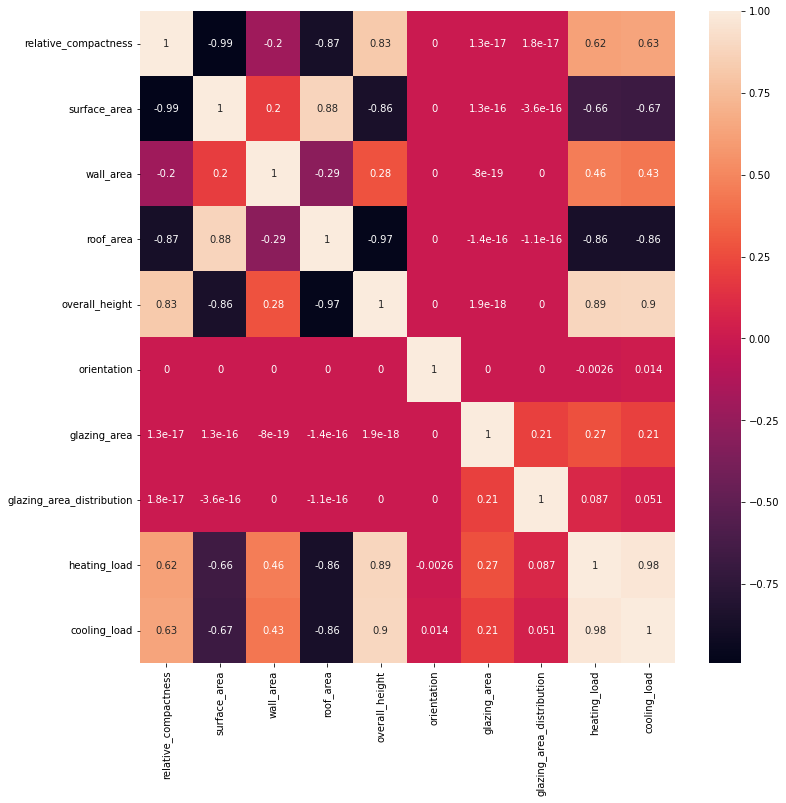

In [ ]:
#To know the correlation between variables in numbers
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

In [ ]:
#As the heatmap is difficult to read, next step is to format it and checking the correlation again
#Change number format in correlations
pd.set_option('display.float_format',lambda x: '{:,.2f}'.format(x) if abs(x) < 10000 else '{:,.0f}'.format(x))

data.corr()

relative_compactness  ...  cooling_load
relative_compactness                       1.00  ...          0.63
surface_area                              -0.99  ...         -0.67
wall_area                                 -0.20  ...          0.43
roof_area                                 -0.87  ...         -0.86
overall_height                             0.83  ...          0.90
orientation                                0.00  ...          0.01
glazing_area                               0.00  ...          0.21
glazing_area_distribution                  0.00  ...          0.05
heating_load                               0.62  ...          0.98
cooling_load                               0.63  ...          1.00

[10 rows x 10 columns]

<Figure size 360x360 with 0 Axes>

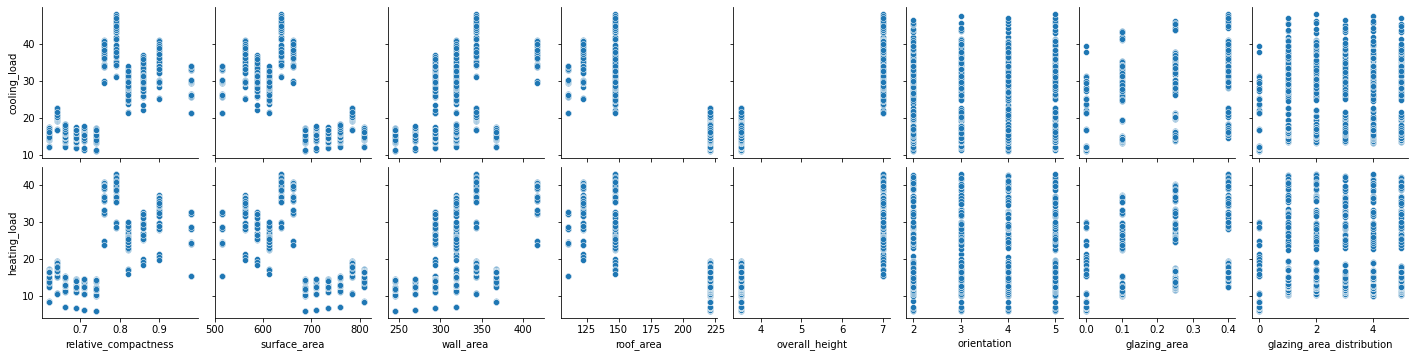

In [ ]:
#heating load and cooling are equally important outputs to be predicte, So we need to see the Correlation between inputs and outputs
plt.figure(figsize=(5,5))
sns.pairplot(data=data, y_vars=['cooling_load','heating_load'],
             x_vars=['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                     'orientation', 'glazing_area', 'glazing_area_distribution',])
plt.show()

In [ ]:
#Preprocessing & Data Transformation
#Checking missing values
data.isnull().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

In [ ]:
#Summary statistics/Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
data.describe()

relative_compactness  surface_area  ...  heating_load  cooling_load
count                768.00        768.00  ...        768.00        768.00
mean                   0.76        671.71  ...         22.31         24.59
std                    0.11         88.09  ...         10.09          9.51
min                    0.62        514.50  ...          6.01         10.90
25%                    0.68        606.38  ...         12.99         15.62
50%                    0.75        673.75  ...         18.95         22.08
75%                    0.83        741.12  ...         31.67         33.13
max                    0.98        808.50  ...         43.10         48.03

[8 rows x 10 columns]

In [ ]:
#Normalizing the inputs and set the output to obtain a better scale, because each feature has a different scale
from sklearn.preprocessing import Normalizer
nr = Normalizer(copy=False)

X = data.drop(['heating_load','cooling_load'], axis=1)
X = nr.fit_transform(X)
y = data[['heating_load','cooling_load']]

In [ ]:
#Before training the models,praparing the input and output using Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [ ]:
#creating Model Evaluation function to evaluate our model using R squared (R2 score)
def evaluate(model, test_features, test_labels):
    from sklearn.metrics import r2_score
    predictions = model.predict(test_features)
    R2 = np.mean(r2_score(test_labels, predictions))
    print('R2 score = %.3f' % R2)
    return r2_score

**As we saw from the histograms above, that the data in our dataset is discrete.Its a categorical data but in numbers.The Tree based algorithms need to be used to expect the best model using this type of data.**

**Creating 2 basic models and then optimze each models using Hyperparameter Search technique. The model we used are:
-Decission Tree Regression, Random Forest Regression

**1. Decission Tree Regressor**

In [ ]:
#Import decision tree regressor
from sklearn.tree import DecisionTreeRegressor
# Create decision tree model 
dt_model = DecisionTreeRegressor(random_state=123)
# Apply the model
dt_model.fit(X_train, y_train)
# Predicted value
y_pred1 = dt_model.predict(X_test)

In [ ]:
#R2 score before optimization
R2_before_dt= evaluate(dt_model, X_test, y_test)

R2 score = 0.969


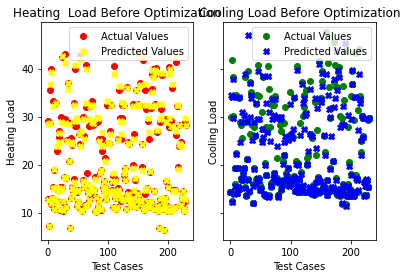

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#Visualize the heating load output before optimization
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(X_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(X_test)),y_pred1[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load Before Optimization')
ax1.legend(loc = 'upper right')

#Visualize the cooling load output before optimization
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(X_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(X_test)),y_pred1[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load Before Optimization')
ax2.legend(loc = 'upper right')

plt.show()

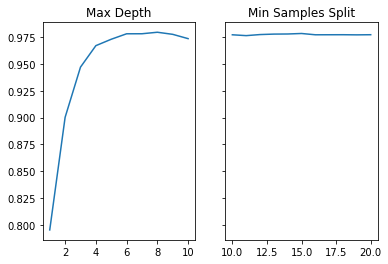

In [ ]:
# Finding the best decision tree optimization parameters

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# Max Depth
dt_acc = []
dt_depth = range(1,11)
for i in dt_depth:
    dt = DecisionTreeRegressor(random_state=123, max_depth=i)
    dt.fit(X_train, y_train)
    dt_acc.append(dt.score(X_test, y_test))
ax1.plot(dt_depth,dt_acc)
ax1.set_title('Max Depth')

#Min Samples Split guarantees a minimum number of samples in a leaf
dt_acc = []
dt_samples_split = range(10,21)
for i in dt_samples_split:
    dt = DecisionTreeRegressor(random_state=123, min_samples_split=i)
    dt.fit(X_train, y_train)
    dt_acc.append(dt.score(X_test, y_test))
ax2.plot(dt_samples_split,dt_acc)
ax2.set_title('Min Samples Split')

plt.show()

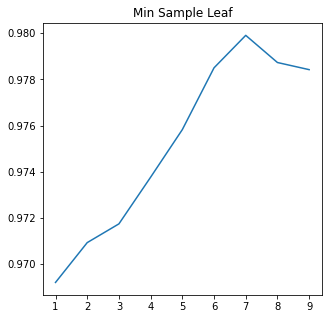

In [ ]:
#Minimum Sample Leaf specifies the minimum number of samples required to be at a leaf node.
plt.figure(figsize = (5,5))
dt_acc = []
dt_samples_leaf = range(1,10)
for i in dt_samples_leaf:
    dt = DecisionTreeRegressor(random_state=123, min_samples_leaf=i)
    dt.fit(X_train, y_train)
    dt_acc.append(dt.score(X_test, y_test))

plt.plot(dt_samples_leaf,dt_acc)
plt.title('Min Sample Leaf')

plt.show()

In [ ]:
# Decision tree optimization parameters
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth' : [7,8,9],
              'min_samples_split': [16,17,18],
              'min_samples_leaf' : [6,7,8]}


#Create new model using the GridSearch
dt_random = GridSearchCV(dt_model, parameters, cv=10)

#Apply the model
dt_random.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'max_depth': [7, 8, 9], 'min_samples_leaf': [6, 7, 8],
                         'min_samples_split': [16, 17, 18]})

In [ ]:
#View the best parameters
dt_random.best_params_

{'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 18}

In [ ]:
# Predicted value
y_pred1_ = dt_random.best_estimator_.predict(X_test)

In [ ]:
#R2 score after optimization
dt_best_random = dt_random.best_estimator_
R2_after_dt= evaluate(dt_best_random, X_test, y_test)

R2 score = 0.979


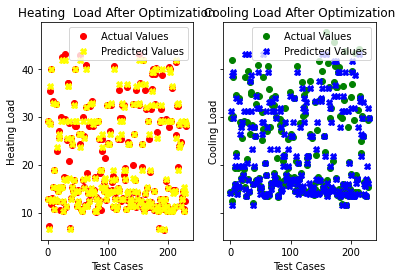

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [ ]:
#Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#Visualize the heating load output after optimization
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(X_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(X_test)),y_pred1_[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load After Optimization')
ax1.legend(loc = 'upper right')

#Visualize the cooling load output after optimization
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(X_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(X_test)),y_pred1_[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load After Optimization')
ax2.legend(loc = 'upper right')

plt.show()

**2. Random Forest Regressor**
A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees.The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.
Random Forest has multiple decision trees as base learning models. It randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap.

In [ ]:
#Import random forest regressor
from sklearn.ensemble import RandomForestRegressor
# Create random forest model 
rf_model = RandomForestRegressor(random_state=123)
# Apply the model
rf_model.fit(X_train, y_train)
# Predicted value
y_pred2 = rf_model.predict(X_test)

In [ ]:
#R2 score before optimization
R2_before_rf= evaluate(rf_model, X_test, y_test)

R2 score = 0.980


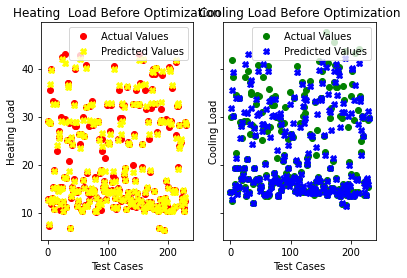

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [ ]:
#Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#Visualize the heating load output before optimization
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(X_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(X_test)),y_pred2[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load Before Optimization')
ax1.legend(loc = 'upper right')

#Visualize the cooling load output before optimization
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(X_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(X_test)),y_pred2[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load Before Optimization')
ax2.legend(loc = 'upper right')

plt.show()

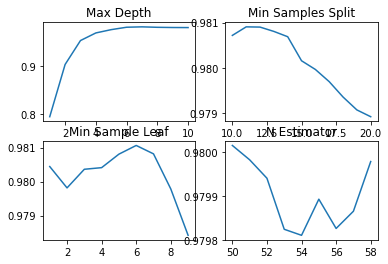

In [ ]:
# Finding the best random forest optimization parameters

f, axarr = plt.subplots(2, 2)

# Max Depth
rf_acc = []
rf_depth = range(1,11)
for i in rf_depth:
    rf = RandomForestRegressor(random_state=123, max_depth=i)
    rf.fit(X_train, y_train)
    rf_acc.append(rf.score(X_test, y_test))
axarr[0, 0].plot(rf_depth,rf_acc)
axarr[0, 0].set_title('Max Depth')

#Min Samples Split
rf_acc = []
rf_samples_split = range(10,21)
for i in rf_samples_split:
    rf = RandomForestRegressor(random_state=123, min_samples_split=i)
    rf.fit(X_train, y_train)
    rf_acc.append(rf.score(X_test, y_test))
axarr[0, 1].plot(rf_samples_split,rf_acc)
axarr[0, 1].set_title('Min Samples Split')

#Min Sample Leaf
rf_acc = []
rf_samples_leaf = range(1,10)
for i in rf_samples_leaf:
    rf = RandomForestRegressor(random_state=123, min_samples_leaf=i)
    rf.fit(X_train, y_train)
    rf_acc.append(rf.score(X_test, y_test))

axarr[1, 0].plot(rf_samples_leaf,rf_acc)
axarr[1, 0].set_title('Min Sample Leaf')

#N Estimator
rf_acc = []
rf_estimators = range(50,59)
for i in rf_estimators:
    rf = RandomForestRegressor(random_state=123, n_estimators=i)
    rf.fit(X_train, y_train)
    rf_acc.append(rf.score(X_test, y_test))

axarr[1, 1].plot(rf_estimators,rf_acc)
axarr[1, 1].set_title('N Estimator')

plt.show()

In [ ]:
# Random forest optimization parameters(Hyperparameter tuning)
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth' : [6,7,8],
              'min_samples_split': [11,12,13],
              'min_samples_leaf' : [4,5,6],
              'n_estimators': [49,50,51]}


#Create new model using the GridSearch
rf_random = GridSearchCV(rf_model, parameters, cv=10)

#Apply the model
rf_random.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [6, 7, 8], 'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [11, 12, 13],
                         'n_estimators': [49, 50, 51]})

In [ ]:
#View the best parameters
rf_random.best_params_

{'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 51}

In [ ]:
# Predicted values
y_pred2_ = rf_random.best_estimator_.predict(X_test)

In [ ]:
#R2 score after optimization
best_random_rf = rf_random.best_estimator_
R2_after_rf= evaluate(best_random_rf, X_test, y_test)

R2 score = 0.980


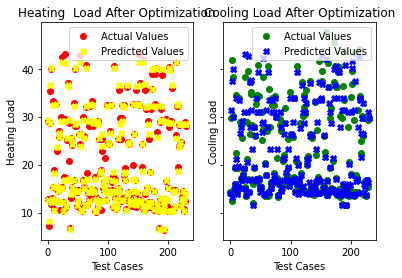

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [ ]:
#Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#Visualize the heating load output after optimization
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(X_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(X_test)),y_pred2_[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load After Optimization')
ax1.legend(loc = 'upper right')

#Visualize the cooling load output after optimization
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(X_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(X_test)),y_pred2_[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load After Optimization')
ax2.legend(loc = 'upper right')

plt.show()

**As R2 score is not always the best indicator of fit. R squared (R2 score) will always increase as we add more independent variables – but adjusted R2 will decrease if we add an independent variable that does not help the model**

In [ ]:
# create a fitted model with all features
import statsmodels.formula.api as smf
data2=data.copy()
lm1 = smf.ols(formula='heating_load ~ relative_compactness + surface_area + wall_area + roof_area + overall_height + orientation + glazing_area + glazing_area_distribution', data=data2).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Summarizing the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           heating_load   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:53:09   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    84.0145     19.034      4.414      0.000      46.650     121.379
relative_compactness        -64.7740     10.289     -6.295      0.000     -84.973     -44.575
surface_area                 -0.0626      0.013     -4.670      0.000      -0.089      -0.036
wall_area                     0.0361      0.004      9.386      0.000       0.029       0.044
roof_area                    -0.0494      0.008     -6.569      0.000      -0.064      -0.035
overall_height                4.1699      0.338     12.337      0.000       3.506       4.833
orientation                  -0.0233      0.095     -0.246      0.805      -0.209       0.163
glazing_area                 19.9327      0.814     24.488      0.000      18.335      21.531
glazing_area_distribution     0.2038      0.070      2.914      0.004       0.067       0.341
==============================================================================
Omnibus:                       18.648   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.708
Skew:                           0.044   Prob(JB):                     6.48e-09
Kurtosis:                       4.082   Cond. No.                     1.46e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.15e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# creating a fitted model with all features excluding the feature "orientation"
lm2 = smf.ols(formula='heating_load ~ relative_compactness + surface_area + wall_area + roof_area + overall_height + glazing_area + glazing_area_distribution', data=data2).fit()

In [ ]:
# Summarizing the fitted model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           heating_load   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1387.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:53:10   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3839.
Df Residuals:                     761   BIC:                             3871.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    83.9329     19.019      4.413      0.000      46.597     121.269
relative_compactness        -64.7740     10.283     -6.299      0.000     -84.961     -44.587
surface_area                 -0.0626      0.013     -4.673      0.000      -0.089      -0.036
wall_area                     0.0361      0.004      9.392      0.000       0.029       0.044
roof_area                    -0.0494      0.008     -6.573      0.000      -0.064      -0.035
overall_height                4.1699      0.338     12.345      0.000       3.507       4.833
glazing_area                 19.9327      0.813     24.503      0.000      18.336      21.530
glazing_area_distribution     0.2038      0.070      2.916      0.004       0.067       0.341
==============================================================================
Omnibus:                       18.654   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.740
Skew:                           0.044   Prob(JB):                     6.38e-09
Kurtosis:                       4.082   Cond. No.                     1.45e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.15e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# **Technique-2 DENSE NEURAL NETWORK on EE01-Dataset(Dataset-1)**

In [ ]:
# Importing the libraries such as pandas, NumPy, tensorflow etc.
import pandas as pd
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

In [ ]:
#mounting the google drive where the dataset is stored to the google colab
data = pd.read_csv('/content/gdrive/My Drive/Dataset3.csv')
df = pd.DataFrame.from_dict(data);
df

X1     X2     X3     X4   X5  X6   X7  X8    Y1    Y2
0   0.98 514.50 294.00 110.25 7.00   2 0.00   0 15.55 21.33
1   0.98 514.50 294.00 110.25 7.00   3 0.00   0 15.55 21.33
2   0.98 514.50 294.00 110.25 7.00   4 0.00   0 15.55 21.33
3   0.98 514.50 294.00 110.25 7.00   5 0.00   0 15.55 21.33
4   0.90 563.50 318.50 122.50 7.00   2 0.00   0 20.84 28.28
..   ...    ...    ...    ...  ...  ..  ...  ..   ...   ...
763 0.64 784.00 343.00 220.50 3.50   5 0.40   5 17.88 21.40
764 0.62 808.50 367.50 220.50 3.50   2 0.40   5 16.54 16.88
765 0.62 808.50 367.50 220.50 3.50   3 0.40   5 16.44 17.11
766 0.62 808.50 367.50 220.50 3.50   4 0.40   5 16.48 16.61
767 0.62 808.50 367.50 220.50 3.50   5 0.40   5 16.64 16.03

[768 rows x 10 columns]

In [ ]:
# The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2)
# Rename columns 
data.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']
data

relative_compactness  surface_area  ...  heating_load  cooling_load
0                    0.98        514.50  ...         15.55         21.33
1                    0.98        514.50  ...         15.55         21.33
2                    0.98        514.50  ...         15.55         21.33
3                    0.98        514.50  ...         15.55         21.33
4                    0.90        563.50  ...         20.84         28.28
..                    ...           ...  ...           ...           ...
763                  0.64        784.00  ...         17.88         21.40
764                  0.62        808.50  ...         16.54         16.88
765                  0.62        808.50  ...         16.44         17.11
766                  0.62        808.50  ...         16.48         16.61
767                  0.62        808.50  ...         16.64         16.03

[768 rows x 10 columns]

In [ ]:
# We have implemented utility function for actual and predicted values plot
# We also have implemented data conversion functions such as normalizing data
def format_output(data):
    y1 = data.pop('heating_load')
    y1 = np.array(y1)
    y2 = data.pop('cooling_load')
    y2 = np.array(y2)
    return y1, y2

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

def plot_difference(y_true, y_pred, title='Neural Networks stats'):
    plt.scatter(y_true, y_pred)
    plt.title(title)

    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())

    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.axis('equal')
    plt.axis('scaled')

    plt.plot([-70, 70], [-70, 70])
    plt.show()

def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(model_history.history[metric_name], color='red', label=metric_name)
    plt.plot(model_history.history['val_' + metric_name], color='blue', label='val_' + metric_name)
    plt.show()

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

# We will split our dataset into train and test with 70% train and 30% test
train, test = train_test_split(df, test_size=0.3)
train_stats = train.describe()

# After dataset split, we are getting heating_load and cooling_load as the two outputs and format train and test data as np arrays
train_stats.pop('heating_load')
train_stats.pop('cooling_load')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

# Normalize the training and testing data
norm_train_X = norm(train)
norm_test_X = norm(test)

In [ ]:
# Define model layers where we have layer with 128 dimensional output space and rectified linear unit activation function
input_layer = Input(shape=(len(train .columns),))
first_dense = Dense(units='128', activation='relu')(input_layer)
second_dense = Dense(units='128', activation='relu')(first_dense)

# From second dense, we will use Heading load output
hl_output = Dense(units='1', name='hl_output')(second_dense)
third_dense = Dense(units='64', activation='relu')(second_dense)

# From third dense, we will use Cooling load output
cl_output = Dense(units='1', name='cl_output')(third_dense)

# We have defined model using input layer and heating_load , cooling_load output as a list 
nn_model = Model(inputs=input_layer, outputs=[hl_output, cl_output])

print(nn_model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          1152        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 128)          16512       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 64)           8256        ['dense_1[0][0]']                
                                                                                              

In [ ]:
# We are using stochastic gradient descent(SGD) optimizer with a learning rate of 0.001
# Then compiling the model with loss functions for both heating load and cooling load outputs
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
nn_model.compile(optimizer=optimizer,
              loss={'hl_output': 'mean_squared_error', 'cl_output': 'mean_squared_error'},
              metrics={'hl_output': tf.keras.metrics.RootMeanSquaredError(),
                       'cl_output': tf.keras.metrics.RootMeanSquaredError()})

In [ ]:
# Model is trained on batch size of 15 and 600 epochs
model_history = nn_model.fit(norm_train_X, train_Y,
                    epochs=600, batch_size=15, validation_data=(norm_test_X, test_Y))

Epoch 1/600
36/36 [==============================] - 1s 10ms/step - loss: 397.6410 - hl_output_loss: 201.2356 - cl_output_loss: 196.4054 - hl_output_root_mean_squared_error: 14.1858 - cl_output_root_mean_squared_error: 14.0145 - val_loss: 71.6613 - val_hl_output_loss: 20.6284 - val_cl_output_loss: 51.0329 - val_hl_output_root_mean_squared_error: 4.5418 - val_cl_output_root_mean_squared_error: 7.1437
Epoch 2/600
36/36 [==============================] - 0s 3ms/step - loss: 35.7666 - hl_output_loss: 15.2919 - cl_output_loss: 20.4748 - hl_output_root_mean_squared_error: 3.9105 - cl_output_root_mean_squared_error: 4.5249 - val_loss: 35.7471 - val_hl_output_loss: 12.1417 - val_cl_output_loss: 23.6054 - val_hl_output_root_mean_squared_error: 3.4845 - val_cl_output_root_mean_squared_error: 4.8585
Epoch 3/600
36/36 [==============================] - 0s 3ms/step - loss: 27.9711 - hl_output_loss: 11.6671 - cl_output_loss: 16.3040 - hl_output_root_mean_squared_error: 3.4157 - cl_output_root_mean_s

In [ ]:
# In the model test step, we are calculating loss and mean squared error for heating and cooling load outputs
loss, hl_loss, cl_loss, hl_rmse, cl_rmse = nn_model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, hl_loss = {}, hl_mse = {}, cl_loss = {}, cl_mse = {}".format(loss, hl_loss, hl_rmse, cl_loss, cl_rmse))

8/8 [==============================] - 0s 2ms/step - loss: 1.5811 - hl_output_loss: 0.2498 - cl_output_loss: 1.3313 - hl_output_root_mean_squared_error: 0.4998 - cl_output_root_mean_squared_error: 1.1538
Loss = 1.5810739994049072, hl_loss = 0.24976174533367157, hl_mse = 0.499761700630188, cl_loss = 1.3313122987747192, cl_mse = 1.153825044631958


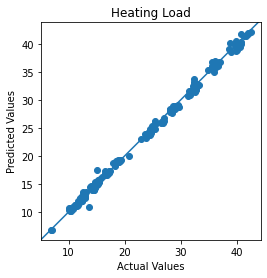

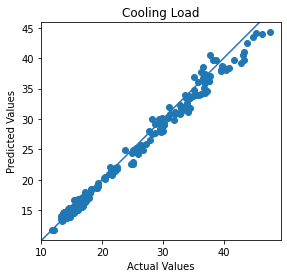

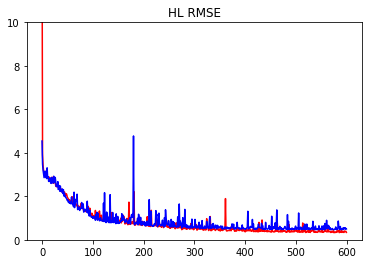

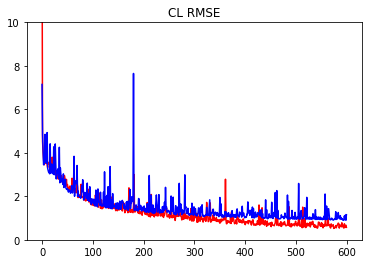

In [ ]:
# We have plotted loss and mean squared error graphs
Y_pred = nn_model.predict(norm_test_X)
plot_difference(test_Y[0], Y_pred[0], title='Heating Load')
plot_difference(test_Y[1], Y_pred[1], title='Cooling Load')
plot_metrics(metric_name='hl_output_root_mean_squared_error', title='HL RMSE', ylim=10)
plot_metrics(metric_name='cl_output_root_mean_squared_error', title='CL RMSE', ylim=10)